## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [3]:
data = pd.read_csv("./data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.isnull() # creates a table with boolean values

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [5]:
data.isnull().sum() # easy to find which column has null value when dealing with large data

x    0
y    1
dtype: int64

# Data Processing

In [6]:
data = data.dropna()
print(f"Shape of the data: {data.shape}")

Shape of the data: (699, 2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting data

In [8]:
# Training input and output
# storing first 500 values from the column x and reshaping to maintain structure of 500 rows and 1 column
train_input = np.array(data.x[0:500]).reshape(500, 1) 
train_output = np.array(data.y[0:500]).reshape(500, 1)

# Validation data input and output
test_input = np.array(data.x[500: 700]).reshape(199, 1) 
test_output = np.array(data.y[500: 699]).reshape(199, 1) # y coulmn is having a null value hence we have used 699

In [9]:
print(f"training data input shape: {train_input.shape}")
print(f"training data output shape: {train_output.shape}")
print(f"test data input shape: {test_input.shape}")
print(f"test data output shape: {test_output.shape}")

training data input shape: (500, 1)
training data output shape: (500, 1)
test data input shape: (199, 1)
test data output shape: (199, 1)


# Linear Regression
## Forward Propogation
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

w = m;
b = c

In [11]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    prediction = np.multiply(m, train_input) + c

    return prediction

## Cost Function

The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [12]:
def cost_function(predictions, train_output):
    
    cost = np.mean((predictions - train_output)**2) * 0.5

    return cost


## Gradient Descent for Back Propogation

So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [13]:
def backward_prpagation(train_input, train_output, predictions):
    # df = summ(f(x) - y)/n
    # dm = df * x
    # dc = df * 1

    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives

## Update Parameters
m = m - (learning rate * dm)

c = c - (learning rate * dc)

In [14]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - (learning_rate * derivatives['dm'])
    parameters['c'] = parameters['c'] - (learning_rate * derivatives['dc'])

    return parameters

## Model Training

In [18]:
def train(train_input, train_output, learning_rate, iterations):
    # random paramters
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)

    plt.figure()

    # loss
    loss = list()

    # iterations
    for i in range(iterations):

        # forward propagation
        predictions = forward_propagation(train_input, parameters)

        # Cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iterations: {i+1}, Loss: {cost}")

        # plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legends = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()

        # backward propagation
        derivatives = backward_prpagation(train_input, train_output, predictions)

        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

## Training

Iterations: 1, Loss: 80.4560531334559


<Figure size 640x480 with 0 Axes>

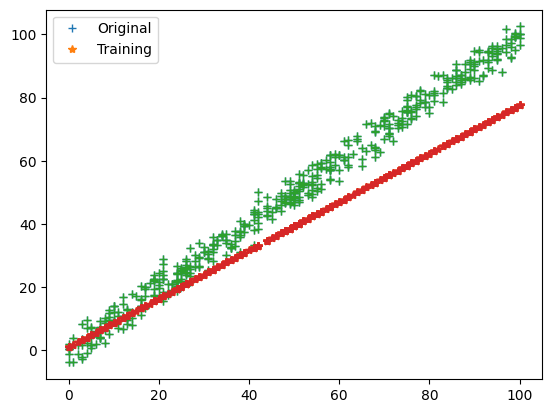

Iterations: 2, Loss: 38.74419834265452


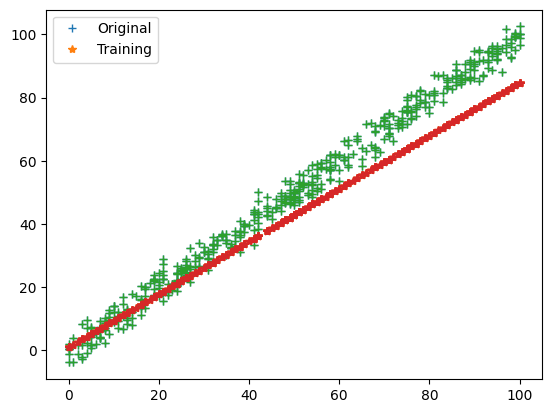

Iterations: 3, Loss: 19.819478334489773


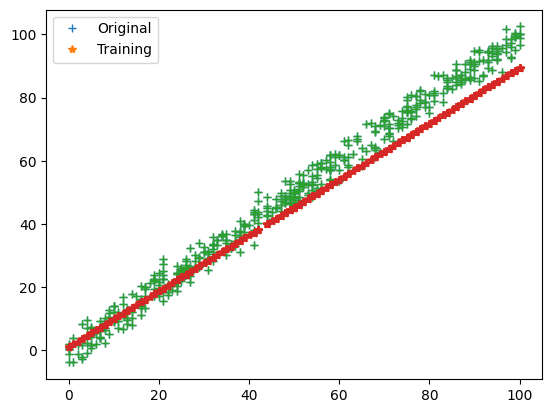

Iterations: 4, Loss: 11.23330661744328


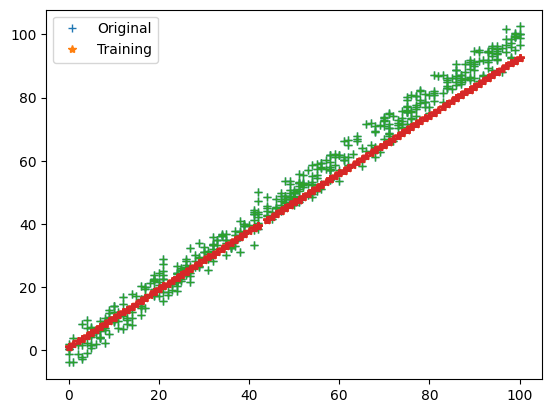

Iterations: 5, Loss: 7.337745711745682


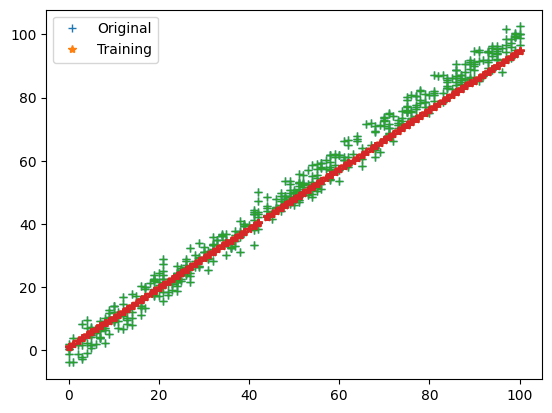

Iterations: 6, Loss: 5.570320126937261


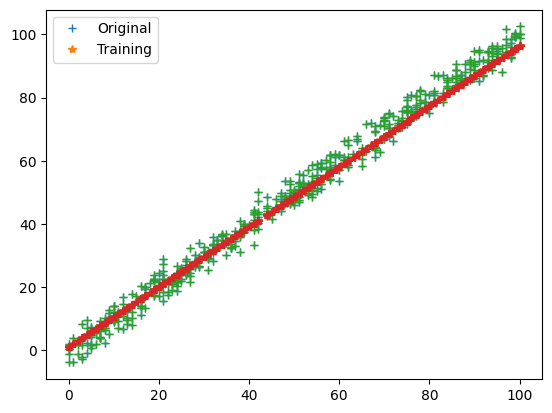

Iterations: 7, Loss: 4.768431894692968


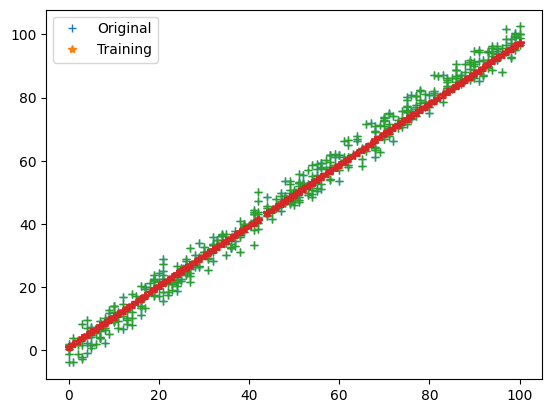

Iterations: 8, Loss: 4.404609029042312


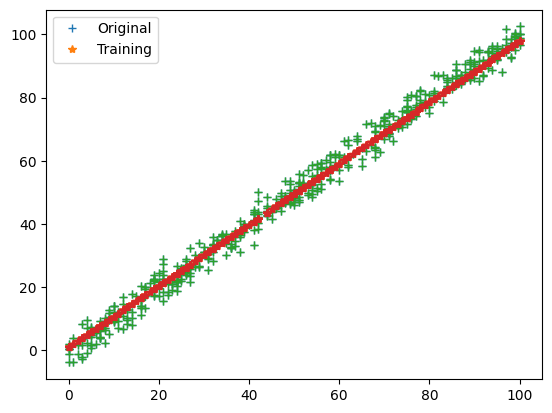

Iterations: 9, Loss: 4.239536905700723


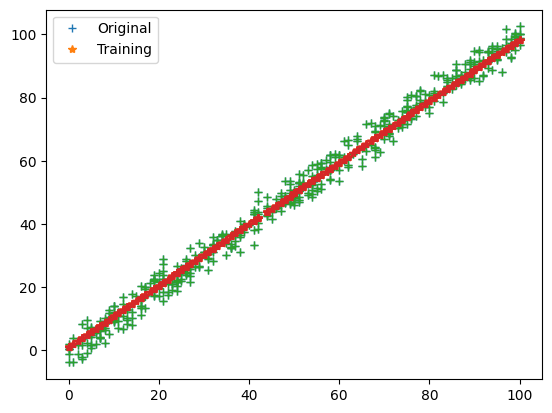

Iterations: 10, Loss: 4.164638214555562


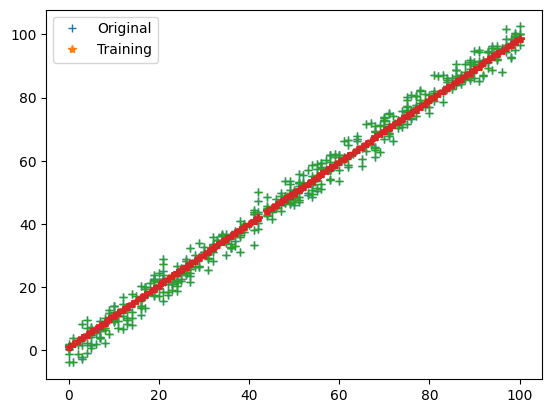

Iterations: 11, Loss: 4.1306513097440005


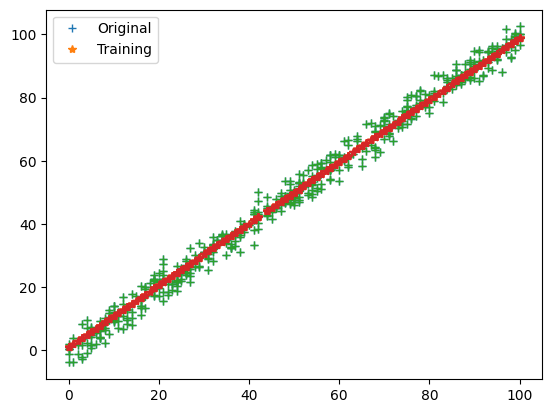

Iterations: 12, Loss: 4.115226127973832


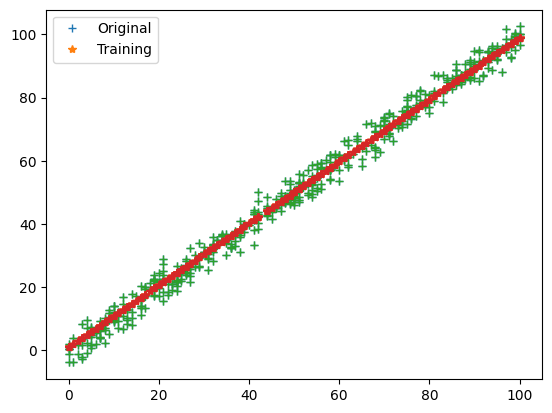

Iterations: 13, Loss: 4.108222420773513


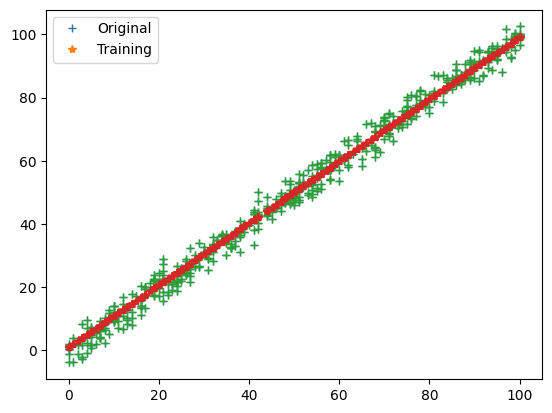

Iterations: 14, Loss: 4.105039546179742


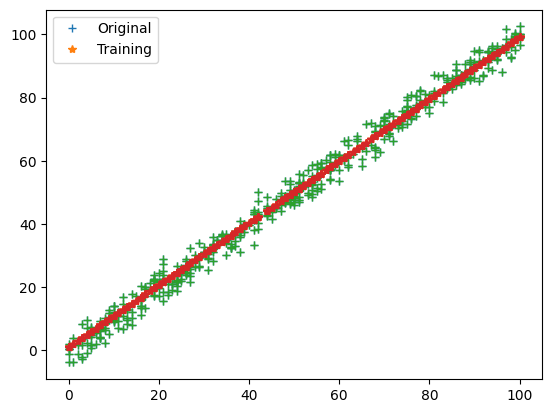

Iterations: 15, Loss: 4.103590187837886


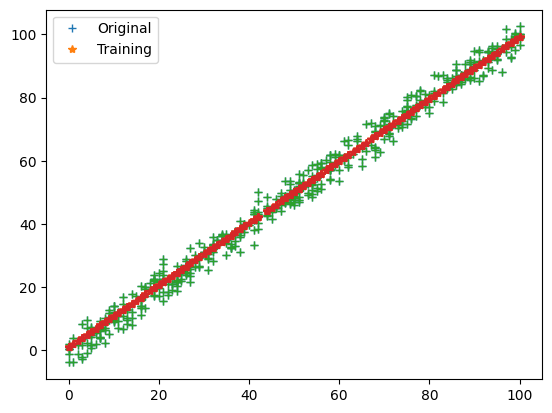

Iterations: 16, Loss: 4.102927328005847


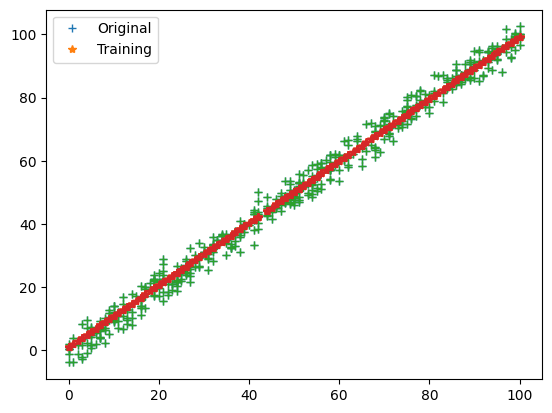

Iterations: 17, Loss: 4.102621303685054


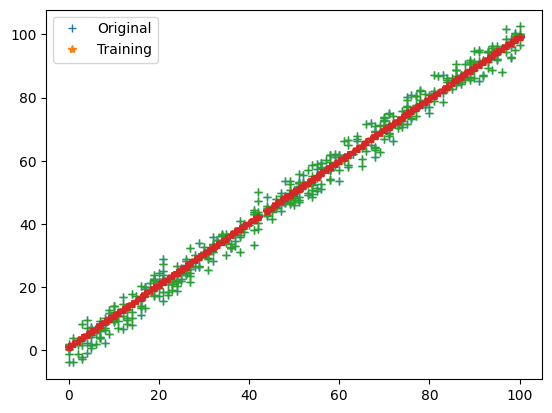

Iterations: 18, Loss: 4.102477176297142


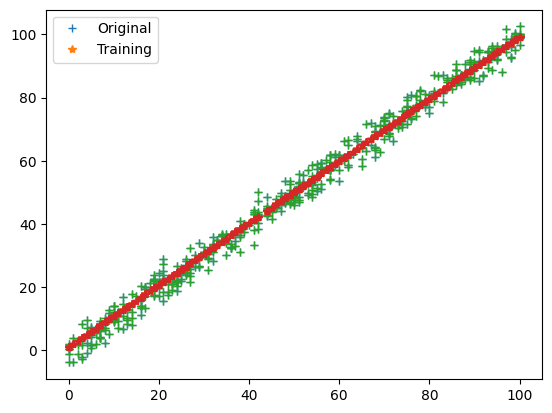

Iterations: 19, Loss: 4.102406501993157


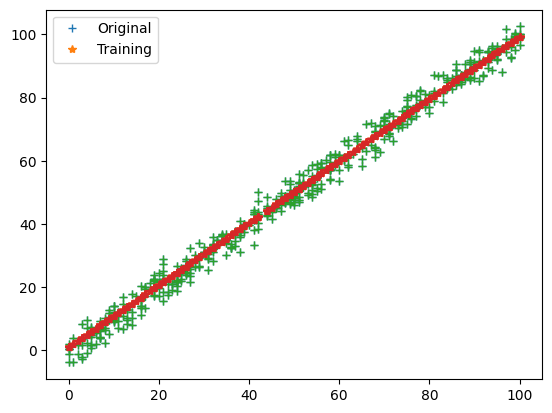

Iterations: 20, Loss: 4.102369153700868


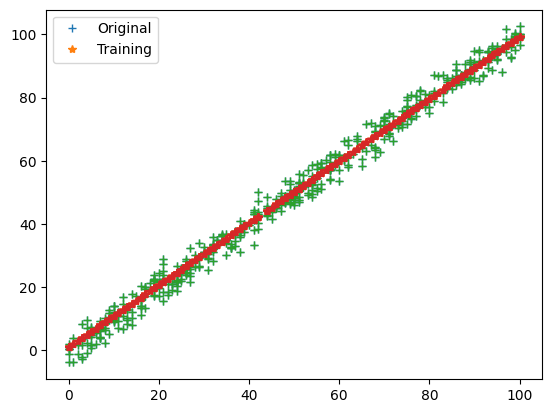

In [19]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [20]:
loss

[80.4560531334559,
 38.74419834265452,
 19.819478334489773,
 11.23330661744328,
 7.337745711745682,
 5.570320126937261,
 4.768431894692968,
 4.404609029042312,
 4.239536905700723,
 4.164638214555562,
 4.1306513097440005,
 4.115226127973832,
 4.108222420773513,
 4.105039546179742,
 4.103590187837886,
 4.102927328005847,
 4.102621303685054,
 4.102477176297142,
 4.102406501993157,
 4.102369153700868]

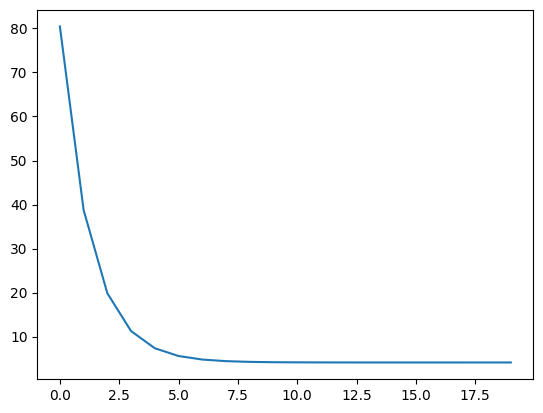

In [21]:
plt.plot(loss)


## Let's Predict

In [22]:
test_predict = test_input * parameters['m'] + parameters['c']

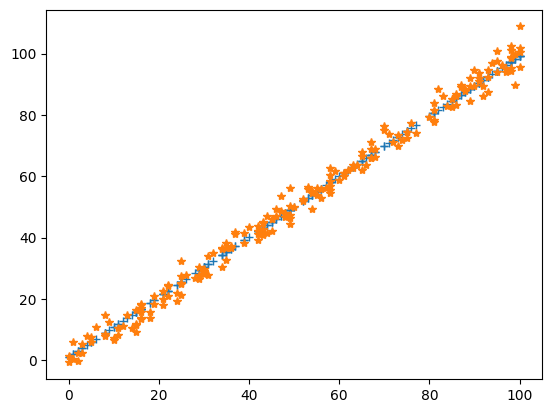

In [23]:
plt.plot(test_input, test_predict, "+")
plt.plot(test_input, test_output, "*")
plt.show()

## Cost prediction

In [24]:
cost_function(test_predict, test_output)

4.069435285248698